In [1]:
%load_ext autoreload
%autoreload 2
import sys
import torch
import math
import numpy as np
from torch import nn
sys.path.append('..')
from pathlib import Path
from typing import Union
from erank.data import get_metadataset_class
from omegaconf import OmegaConf
from torch.utils import data
from erank.utils import load_directions_matrix_from_task_sweep
import matplotlib.pyplot as plt
from erank.data.omniglotdataset import OmniglotDataset
from ml_utilities.data_utils import show_images
gpu_id = 0

/home/max/anaconda3/envs/erank/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
data_dir = '/home/max/phd/data'
dataset_name = 'omniglot'
top_level_folders = [
    'images_background',  # original train data 
    'images_evaluation',  # original test data
]
dataset_split_toplevel_folders = {
    'train': 'images_background',
    'val': 'images_background',
    'test': 'images_evaluation'
}

In [3]:
dataset_dir = Path(data_dir) / dataset_name

In [4]:
toplevel_folders_disk = [d.stem for d in dataset_dir.iterdir() if d.is_dir()]

In [5]:
set(top_level_folders).issubset(set(toplevel_folders_disk))

True

In [6]:
background_alphabets = [a.stem for a in (dataset_dir/ 'images_background').iterdir()]
evaluation_alphabets = [a.stem for a in (dataset_dir/ 'images_evaluation').iterdir()]
len(background_alphabets), len(evaluation_alphabets)

(30, 20)

In [7]:
ogds = OmniglotDataset(data_root_path=data_dir,
                       n_way_classification=5,
                       support_size=5,
                       query_size=10,
                       split='train',
                       dataset_layout='metadataset',
                       seed=0)

Loading Omniglot Alphabets: 100%|██████████| 25/25 [00:06<00:00,  3.96it/s]


In [11]:
classes = list(ogds._data.keys())
len(classes)

883

In [9]:
imgs = ogds._data[classes[0]]
imgs.shape

(20, 1, 28, 28)

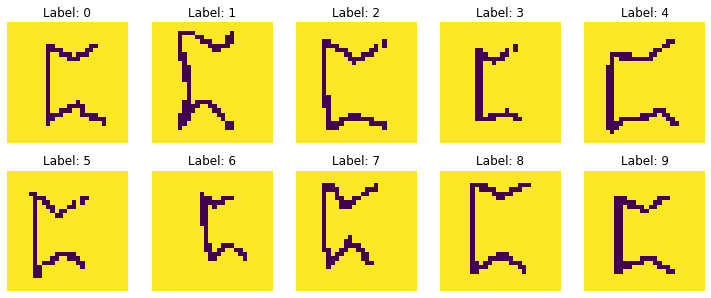

In [10]:
show_images(imgs, num_images=10, n_cols=5)

In [13]:
import itertools
list(itertools.combinations(classes, 5))

In [3]:
math.factorial(883) / (math.factorial(5)*math.factorial(778))

2.8090403448638284e+304